In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [8]:
start = '2014-09-16'
end = '2023-11-09'

df = yf.download('BTC-USD', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,35082.195312,9561294264
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996
2023-11-06,35044.789062,35286.027344,34765.363281,35037.371094,35037.371094,12693436420
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918


In [10]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [11]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


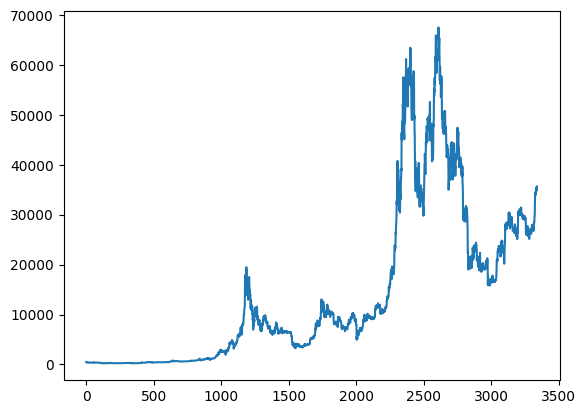

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3335    28324.250195
3336    28381.551289
3337    28438.355820
3338    28500.038359
3339    28564.290020
Name: Close, Length: 3340, dtype: float64

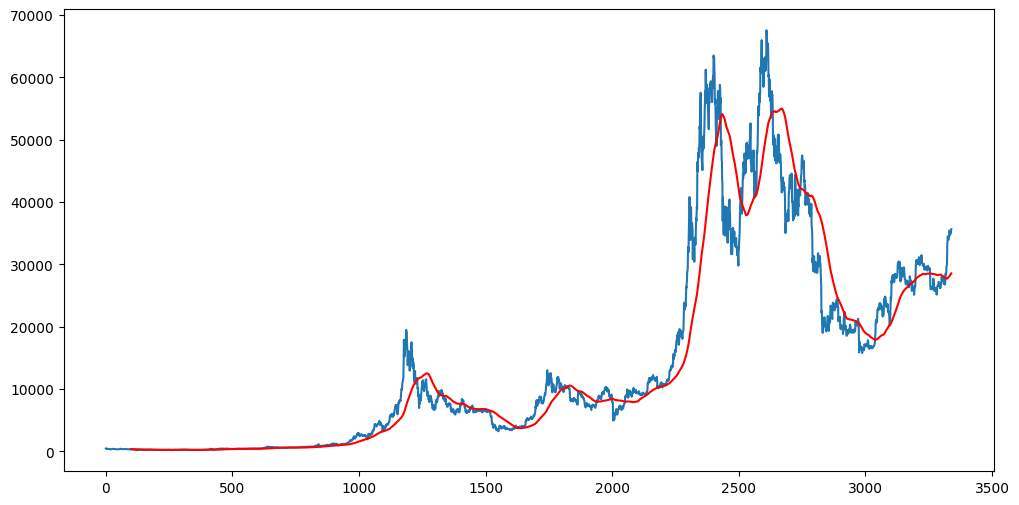

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3335    28368.704619
3336    28399.837998
3337    28433.794912
3338    28474.628174
3339    28513.817061
Name: Close, Length: 3340, dtype: float64

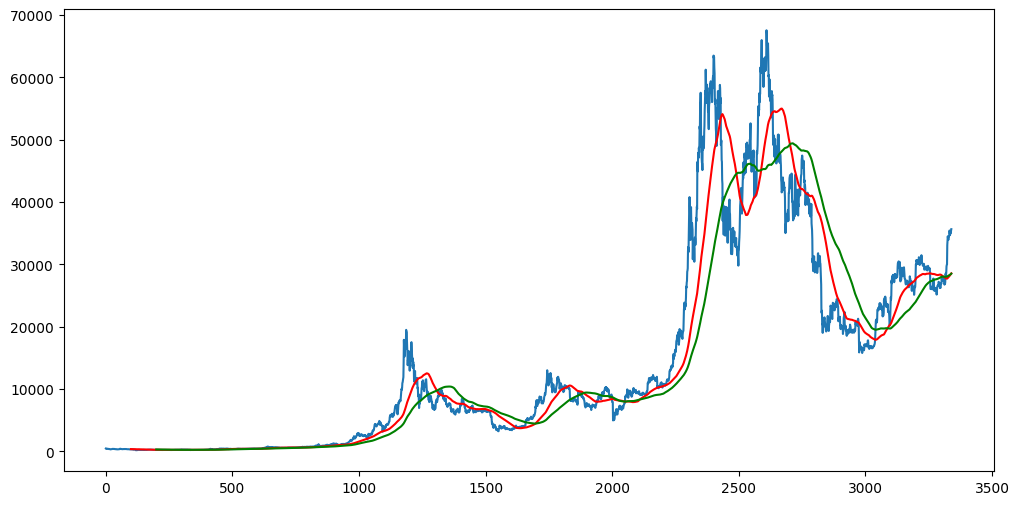

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [17]:
df.shape

(3340, 5)

In [18]:
#Splitting Data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2338, 1)
(1002, 1)


In [19]:
data_training.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [20]:
data_testing.head()

,Close
2338,44918.183594
2339,47909.332031
2340,47504.851562
2341,47105.515625
2342,48717.289062


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00603052],
       [0.00532011],
       [0.00467989],
       ...,
       [0.83634616],
       [0.99385265],
       [1.        ]])

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
# ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2023-11-09 15:02:57.258706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [33]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
70/70 [==============================] - 10s 99ms/step - loss: 0.0105
Epoch 2/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0033
Epoch 3/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0026
Epoch 4/50
70/70 [==============================] - 7s 100ms/step - loss: 0.0019
Epoch 5/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0022
Epoch 6/50
70/70 [==============================] - 7s 100ms/step - loss: 0.0025
Epoch 7/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0018
Epoch 8/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0018
Epoch 9/50
70/70 [==============================] - 7s 103ms/step - loss: 0.0017
Epoch 10/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0015
Epoch 11/50
70/70 [==============================] - 7s 103ms/step - loss: 0.0017
Epoch 12/50
70/70 [==============================] - 7s 99ms/step - loss: 0.0016
Epoch 13/50
70/70 [=============

In [75]:
data_testing.head()

,Close
2338,44918.183594
2339,47909.332031
2340,47504.851562
2341,47105.515625
2342,48717.289062


In [76]:
data_training.tail(100)

,Close
2238,13550.489258
2239,13950.300781
2240,14133.707031
2241,15579.848633
2242,15565.880859
...,...
2333,38144.308594
2334,39266.011719
2335,38903.441406
2336,46196.464844


In [77]:
past_100_days = data_training.tail(100)

In [78]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [79]:
final_df.head()

,Close
0,13550.489258
1,13950.300781
2,14133.707031
3,15579.848633
4,15565.880859


In [80]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00740168],
       [0.01079706],
       ...,
       [0.39778486],
       [0.40530465],
       [0.40922411]])

In [81]:
input_data.shape

(1102, 1)

In [82]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [83]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1002, 100, 1)
(1002,)


In [84]:
#Making Predictions 

y_predicted = model.predict(x_test)

32/32 [==============================] - 1s 32ms/step


In [85]:
y_predicted.shape

(1002, 1)

In [86]:
y_test

array([0.58070752, 0.63608241, 0.62859429, ..., 0.39778486, 0.40530465,
       0.40922411])

In [87]:
y_predicted

array([[0.46182922],
       [0.49226445],
       [0.52477044],
       ...,
       [0.38078454],
       [0.37980846],
       [0.37883136]], dtype=float32)

In [88]:
scaler.scale_

array([1.8512917e-05])

In [91]:
scale_factor = 1/1.8512917e-05

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

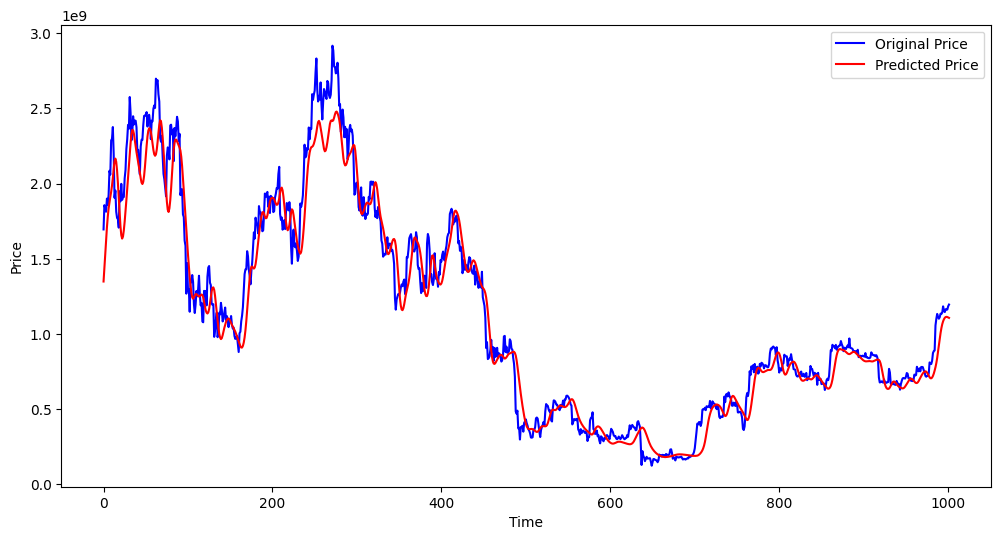

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()